# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2023-10-27 09:29:36.788273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train(6).csv")
rawvalid = pd.read_csv("Validation(2).csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [3]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [4]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [5]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
# history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1539 (6.01 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


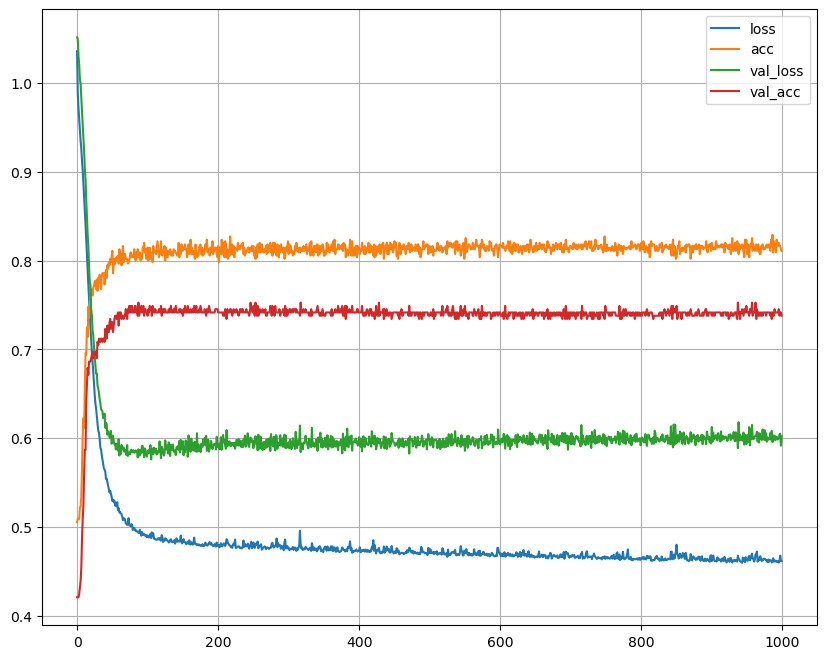

In [6]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [7]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6018844842910767
Validation accuracy: 0.7380073666572571


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

##### First adding the features F3 and F4 as well

In [8]:
# Getting the features and normalizing
f1f2f3f4 = ["F1", "F2", "F3", "F4"]

x_train_f1f2f3f4 = train[f1f2f3f4]
x_mean_train_f1f2f3f4 = np.mean(x_train_f1f2f3f4)
x_train_f1f2f3f4_norm = x_train_f1f2f3f4 - x_mean_train_f1f2f3f4

x_valid_f1f2f3f4 = valid[f1f2f3f4]
x_mean_valid_f1f2f3f4 = np.mean(x_valid_f1f2f3f4)
x_valid_f1f2f3f4_norm = x_valid_f1f2f3f4 - x_mean_valid_f1f2f3f4

# Create a model with a single hidden layer
model_f1f2f3f4 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4.summary()

# Train the model
model_f1f2f3f4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
# history_f1f2f3f4 = model_f1f2f3f4.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history_f1f2f3f4 = model_f1f2f3f4.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               1280      
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2051 (8.01 KB)
Trainable params: 2051 (8.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


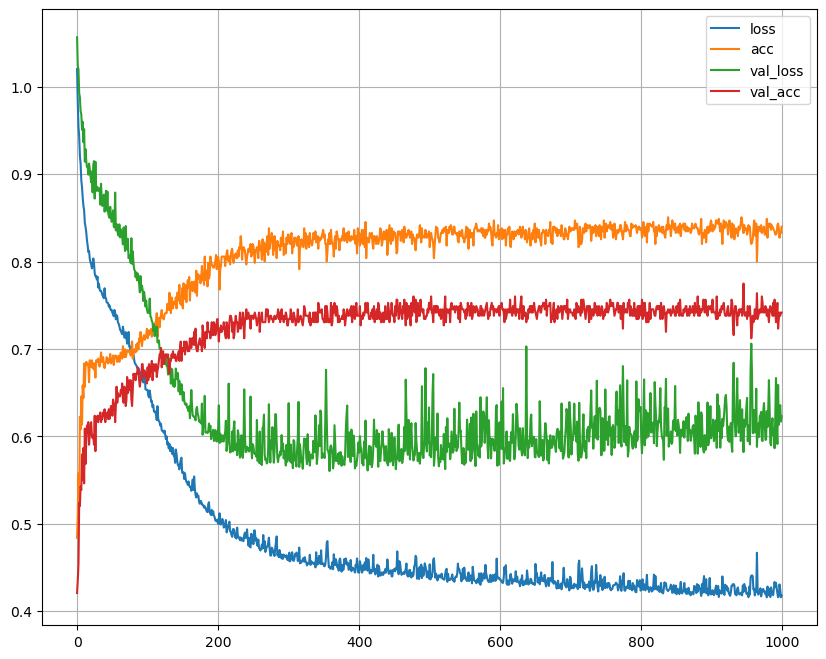

In [9]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4.history['loss'],label='loss')
plt.plot(history_f1f2f3f4.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [10]:
# Validation model
score_f1f2f3f4 = model_f1f2f3f4.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4[0])
print('Validation accuracy:', score_f1f2f3f4[1])

Validation loss: 0.622929036617279
Validation accuracy: 0.7416974306106567


##### Running with F1-F4 and B1-B4

In [11]:
f1f2f3f4b1b2b3b4 = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

x_train_f1f2f3f4b1b2b3b4 = train[f1f2f3f4b1b2b3b4]
x_mean_train_f1f2f3f4b1b2b3b4 = np.mean(x_train_f1f2f3f4b1b2b3b4)
x_train_f1f2f3f4b1b2b3b4_norm = x_train_f1f2f3f4b1b2b3b4 - x_mean_train_f1f2f3f4b1b2b3b4

x_valid_f1f2f3f4b1b2b3b4 = valid[f1f2f3f4b1b2b3b4]
x_mean_valid_f1f2f3f4b1b2b3b4 = np.mean(x_valid_f1f2f3f4b1b2b3b4)
x_valid_f1f2f3f4b1b2b3b4_norm = x_valid_f1f2f3f4b1b2b3b4 - x_mean_valid_f1f2f3f4b1b2b3b4

# Create a model with a single hidden layer
model_f1f2f3f4b1b2b3b4 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4b1b2b3b4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4b1b2b3b4.summary()

# Train the model
model_f1f2f3f4b1b2b3b4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model
# history_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.fit(x_train_f1f2f3f4b1b2b3b4_norm, y_train, validation_data=(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.fit(x_train_f1f2f3f4b1b2b3b4_norm, y_train, validation_data=(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2304      
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


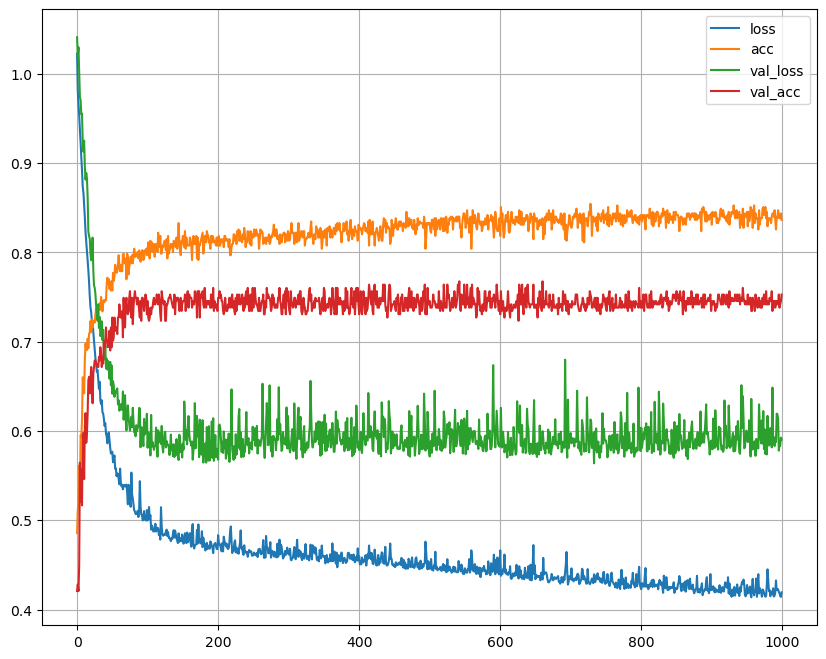

In [12]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4b1b2b3b4.history['loss'],label='loss')
plt.plot(history_f1f2f3f4b1b2b3b4.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4b1b2b3b4.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4b1b2b3b4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [13]:
# Validation model
score_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.evaluate(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4b1b2b3b4[0])
print('Validation accuracy:', score_f1f2f3f4b1b2b3b4[1])

Validation loss: 0.590252161026001
Validation accuracy: 0.7527675032615662


## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

All tests here are done with F1-F4 since they give the best results.

First we reduce the number of hidden nodes to 128

In [14]:
# Create a model with a single hidden layer
model_f1f2f3f4_128 = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_128.summary()

# Train the model
model_f1f2f3f4_128.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_128 = model_f1f2f3f4_128.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# Create a model with a single hidden layer with dropout equal to 50%
model_f1f2f3f4_128_dropout = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_128_dropout.summary()

# Train the model
model_f1f2f3f4_128_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_128_dropout = model_f1f2f3f4_128_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               640       
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 


In [15]:
# Validation model
score_f1f2f3f4_128 = model_f1f2f3f4_128.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_128[0])
print('Validation accuracy:', score_f1f2f3f4_128[1])

score_f1f2f3f4_128_dropout = model_f1f2f3f4_128_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_128_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_128_dropout[1])

Validation loss: 0.6131654381752014
Validation accuracy: 0.7527675032615662
Validation loss with dropout: 0.5723026990890503
Validation accuracy with dropout: 0.7453874349594116


Now we increase the number of hidden nodes to 512

In [16]:
# Create a model with a single hidden layer
model_f1f2f3f4_512 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_512.summary()

# Train the model
model_f1f2f3f4_512.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_512 = model_f1f2f3f4_512.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# Create a model with a single hidden layer with dropout equal to 50%
model_f1f2f3f4_512_dropout = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_512_dropout.summary()

# Train the model
model_f1f2f3f4_512_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_512_dropout = model_f1f2f3f4_512_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               2560      
                                                                 
 dense_11 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 4099 (16.01 KB)
Trainable params: 4099 (16.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               2560      
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                

In [17]:
# Validation model
score_f1f2f3f4_512 = model_f1f2f3f4_512.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_512[0])
print('Validation accuracy:', score_f1f2f3f4_512[1])

score_f1f2f3f4_512_dropout = model_f1f2f3f4_512_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_512_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_512_dropout[1])

Validation loss: 0.6448837518692017
Validation accuracy: 0.7453874349594116
Validation loss with dropout: 0.6462544202804565
Validation accuracy with dropout: 0.7380073666572571


## Problem 3
Add multiple layers to the network and observe the results.

Still using the F1-F4 features

In [18]:
# Create a model with a single hidden layer
model_f1f2f3f4_three_layers = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_three_layers.summary()

# Train the model
model_f1f2f3f4_three_layers.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_three_layers = model_f1f2f3f4_three_layers.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# With dropout equal to 20%
# Create a model with a single hidden layer
model_f1f2f3f4_three_layers_dropout = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_three_layers_dropout.summary()

# Train the model
model_f1f2f3f4_three_layers_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_three_layers_dropout = model_f1f2f3f4_three_layers_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               2560      
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 3)                 387       
                                                                 
Total params: 167171 (653.01 KB)
Trainable params: 167171 (653.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Par

In [19]:
# Validation model
score_f1f2f3f4_three_layers = model_f1f2f3f4_three_layers.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_three_layers[0])
print('Validation accuracy:', score_f1f2f3f4_three_layers[1])

score_f1f2f3f4_three_layers_dropout = model_f1f2f3f4_three_layers_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_three_layers_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_three_layers_dropout[1])

Validation loss: 2.5260586738586426
Validation accuracy: 0.7306272983551025
Validation loss with dropout: 1.898293375968933
Validation accuracy with dropout: 0.7343173623085022


Using two layers

In [20]:
# Create a model with a single hidden layer
model_f1f2f3f4_two_layers = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_two_layers.summary()

# Train the model
model_f1f2f3f4_two_layers.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_two_layers = model_f1f2f3f4_two_layers.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

# With dropout equal to 20%
# Create a model with a single hidden layer
model_f1f2f3f4_two_layers_dropout = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4_two_layers_dropout.summary()

# Train the model
model_f1f2f3f4_two_layers_dropout.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_two_layers_dropout = model_f1f2f3f4_two_layers_dropout.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               1280      
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 3)                 387       
                                                                 
Total params: 34563 (135.01 KB)
Trainable params: 34563 (135.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               1280      
                                                           

In [21]:
# Validation model
score_f1f2f3f4_two_layers = model_f1f2f3f4_two_layers.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4_two_layers[0])
print('Validation accuracy:', score_f1f2f3f4_two_layers[1])

score_f1f2f3f4_two_layers_dropout = model_f1f2f3f4_two_layers_dropout.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss with dropout:', score_f1f2f3f4_two_layers_dropout[0])
print('Validation accuracy with dropout:', score_f1f2f3f4_two_layers_dropout[1])

Validation loss: 0.9486256241798401
Validation accuracy: 0.7453874349594116
Validation loss with dropout: 0.9407933950424194
Validation accuracy with dropout: 0.7121770977973938


## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

To predict the gender of the speaker, can use a neural network with two output nodes, one for each gender. The input can be features (F1-F4 for the first network, F1-F4+B1-B4 for the second network).

Could use all phonemes for training, but I am going to just use the phonemes from before to reduce the time it takes to train the network.

In [22]:
# First getting labels for training and validation sets
genders = ["F", "M"]

gender_train_f1f2f3f4 = train[f1f2f3f4]
gender_valid_f1f2f3f4 = valid[f1f2f3f4]

# Normalize the data
gender_train_f1f2f3f4 = gender_train_f1f2f3f4 - np.mean(gender_train_f1f2f3f4)
gender_valid_f1f2f3f4 = gender_valid_f1f2f3f4 - np.mean(gender_valid_f1f2f3f4)

y_train_g = keras.utils.to_categorical([genders.index(g) for g in train["Gender"]], len(genders))
y_valid_g = keras.utils.to_categorical([genders.index(g) for g in valid["Gender"]], len(genders))

In [23]:
model_f1f2f3f4_gender = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=gender_train_f1f2f3f4.shape[1]),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax, input_dim=256)
])
model_f1f2f3f4_gender.summary()

model_f1f2f3f4_gender.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4_gender = model_f1f2f3f4_gender.fit(gender_train_f1f2f3f4, y_train_g, validation_data=(gender_valid_f1f2f3f4, y_valid_g),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               1280      
                                                                 
 dense_29 (Dense)            (None, 2)                 514       
                                                                 
Total params: 1794 (7.01 KB)
Trainable params: 1794 (7.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


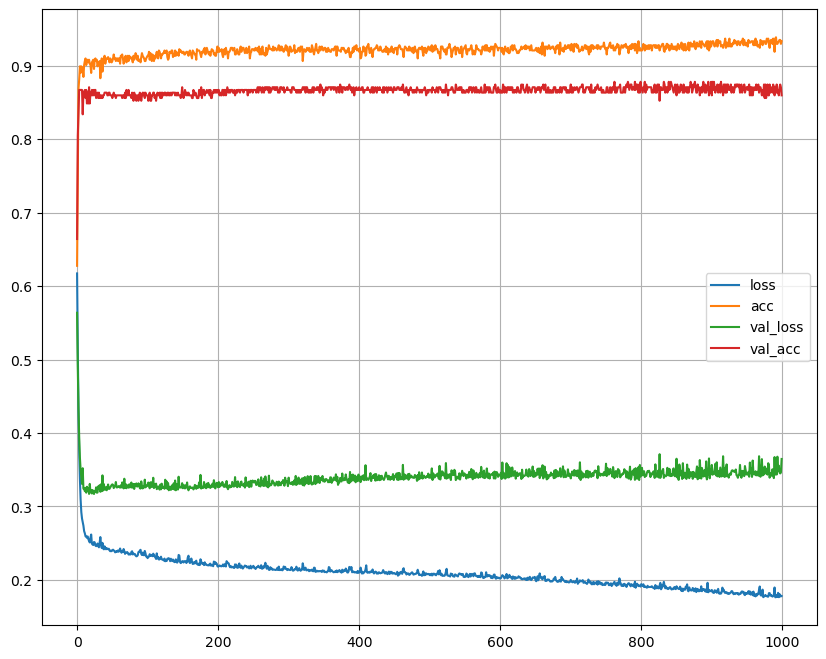

In [24]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4_gender.history['loss'],label='loss')
plt.plot(history_f1f2f3f4_gender.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4_gender.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4_gender.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [25]:
# Validation model
score_f1f2f3f4_gender = model_f1f2f3f4_gender.evaluate(gender_valid_f1f2f3f4, y_valid_g, verbose=0)
print('Validation loss:', score_f1f2f3f4_gender[0])
print('Validation accuracy:', score_f1f2f3f4_gender[1])

Validation loss: 0.36466941237449646
Validation accuracy: 0.8597785830497742


Now also using the features B1-B4

In [26]:
gender_train_f1f2f3f4b1b2b3b4 = train[f1f2f3f4b1b2b3b4]
gender_valid_f1f2f3f4b1b2b3b4 = valid[f1f2f3f4b1b2b3b4]

# Normalize the data
gender_train_f1f2f3f4b1b2b3b4 = gender_train_f1f2f3f4b1b2b3b4 - np.mean(gender_train_f1f2f3f4b1b2b3b4)
gender_valid_f1f2f3f4b1b2b3b4 = gender_valid_f1f2f3f4b1b2b3b4 - np.mean(gender_valid_f1f2f3f4b1b2b3b4)

In [27]:
model_f1f2f3f4b1b2b3b4_gender = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=gender_train_f1f2f3f4b1b2b3b4.shape[1]),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax, input_dim=256)
])
model_f1f2f3f4b1b2b3b4_gender.summary()

model_f1f2f3f4b1b2b3b4_gender.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history_f1f2f3f4b1b2b3b4_gender = model_f1f2f3f4b1b2b3b4_gender.fit(gender_train_f1f2f3f4b1b2b3b4, y_train_g, 
                    validation_data=(gender_valid_f1f2f3f4b1b2b3b4, y_valid_g),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               2304      
                                                                 
 dense_31 (Dense)            (None, 2)                 514       
                                                                 
Total params: 2818 (11.01 KB)
Trainable params: 2818 (11.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


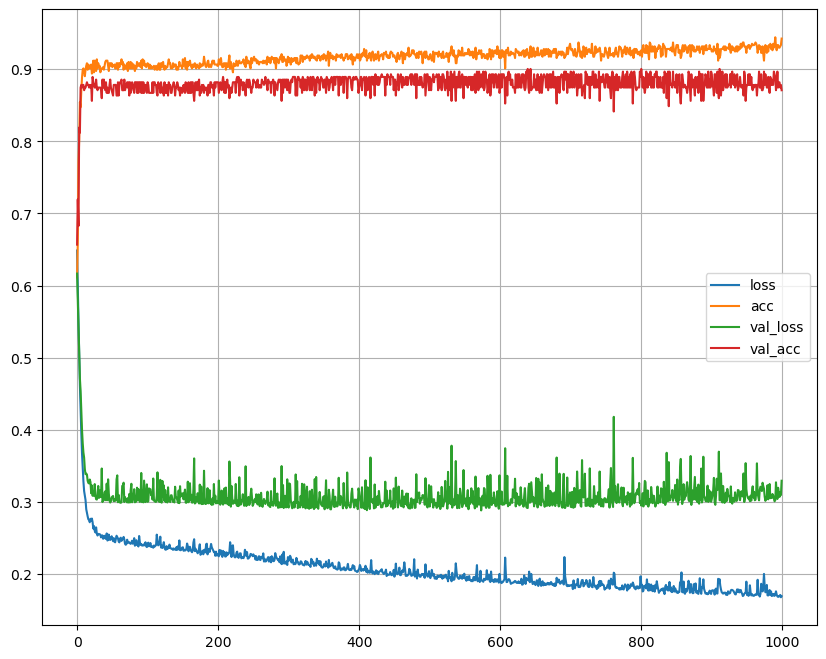

In [28]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4b1b2b3b4_gender.history['loss'],label='loss')
plt.plot(history_f1f2f3f4b1b2b3b4_gender.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4b1b2b3b4_gender.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4b1b2b3b4_gender.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [29]:
# Validation model
score_f1f2f3f4b1b2b3b4_gender = model_f1f2f3f4b1b2b3b4_gender.evaluate(gender_valid_f1f2f3f4b1b2b3b4, y_valid_g, verbose=0)
print('Validation loss:', score_f1f2f3f4b1b2b3b4_gender[0])
print('Validation accuracy:', score_f1f2f3f4b1b2b3b4_gender[1])

Validation loss: 0.3295379877090454
Validation accuracy: 0.8708487153053284


The neural network is better at estimating the gender of the speaker than the phoneme. This can be because there is more spread between the genders than for the phonemes.

One possible way to improve the model for estimating phonemes is by including dropout.

The reason why dropout does not seem to always improve the performance can be because the dropout rate is either too low or too high and that it could benefit from not having dropout at every layer for example.